In [1]:
%matplotlib inline


# Find Regular Segments Using Compact Watershed


The watershed transform is commonly used as a starting point for many
segmentation algorithms. However, without a judicious choice of seeds, it
can produce very uneven fragment sizes, which can be difficult to deal with
in downstream analyses.

The *compact* watershed transform remedies this by favoring seeds that are
close to the pixel being considered.

Both algorithms are implemented in the :py:func:`skimage.morphology.watershed`
function. To use the compact form, simply pass a ``compactness`` value greater
than 0.



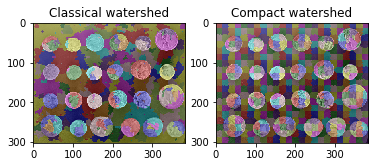

In [2]:
import numpy as np
from skimage import data, util, filters, color
from skimage.morphology import watershed
import matplotlib.pyplot as plt

coins = data.coins()
edges = filters.sobel(coins)

grid = util.regular_grid(coins.shape, n_points=468)

seeds = np.zeros(coins.shape, dtype=int)
seeds[grid] = np.arange(seeds[grid].size).reshape(seeds[grid].shape) + 1

w0 = watershed(edges, seeds)
w1 = watershed(edges, seeds, compactness=0.01)

fig, (ax0, ax1) = plt.subplots(1, 2)

ax0.imshow(color.label2rgb(w0, coins))
ax0.set_title('Classical watershed')

ax1.imshow(color.label2rgb(w1, coins))
ax1.set_title('Compact watershed')

plt.show()